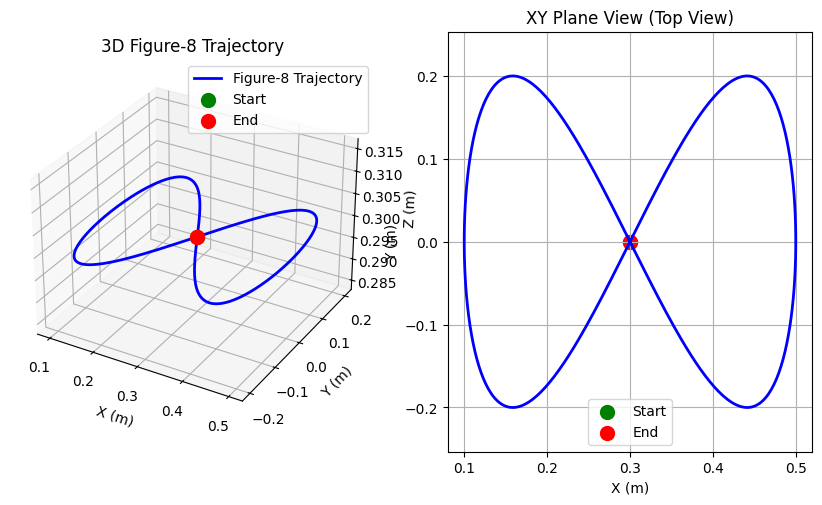

In [1]:
# Create an ideal path for comparison with the implemented trajectory 
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.abspath('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws/src/franka_mujoco_controller/franka_mujoco_controller')
sys.path.append(path)

from TrajectoryGenerator import TrajectoryGenerator

# Create instance without ROS2 (just for using the trajectory function)
traj_gen = TrajectoryGenerator.__new__(TrajectoryGenerator)  # Create without calling __init__

# Generate trajectory data
time_points = np.arange(0, 40.1, 0.1)  # 0 to 40 seconds, 0.1s intervals
positions = []

for t in time_points:
    pos = traj_gen.generate_figure8_trajectory(t)
    positions.append(pos)

positions = np.array(positions)

# Extract X, Y, Z coordinates
x_coords = positions[:, 0]
y_coords = positions[:, 1] 
z_coords = positions[:, 2]

# Create comprehensive plots
fig = plt.figure(figsize=(16, 12))

## 3D Trajectory Plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d') ## 2 * 3 grid, first subplot is 3D
ax1.plot(x_coords, y_coords, z_coords, 'b-', linewidth=2, label='Figure-8 Trajectory')
ax1.scatter(x_coords[0], y_coords[0], z_coords[0], color='green', s=100, label='Start')
ax1.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='red', s=100, label='End')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('3D Figure-8 Trajectory')
ax1.legend()
ax1.grid(True)

# XY Plane View (Top view)
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(x_coords, y_coords, 'b-', linewidth=2)
ax2.scatter(x_coords[0], y_coords[0], color='green', s=100, label='Start')
ax2.scatter(x_coords[-1], y_coords[-1], color='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View (Top View)')
ax2.grid(True)
ax2.axis('equal')
ax2.legend()

# Save trajectory data for later comparison
trajectory_data = {
    'time': time_points,
    'positions': positions,
}

/tmp/ipykernel_20198/2911553311.py:16: DeprecationWarning: Global serialization/deserialization functions have been replaced with
explicit typestores.

If you are deserializing messages from an AnyReader instance, simply
use its `.deserialize(data, typename)` method.

Otherwise instantiate a type store and use its methods:

from rosbags.typesys import Stores, get_typestore

typestore = get_typestore(Stores.ROS2_FOXY)
typestore.deserialize_cdr(data, typename)
  msg = deserialize_cdr(rawdata, connection.msgtype)


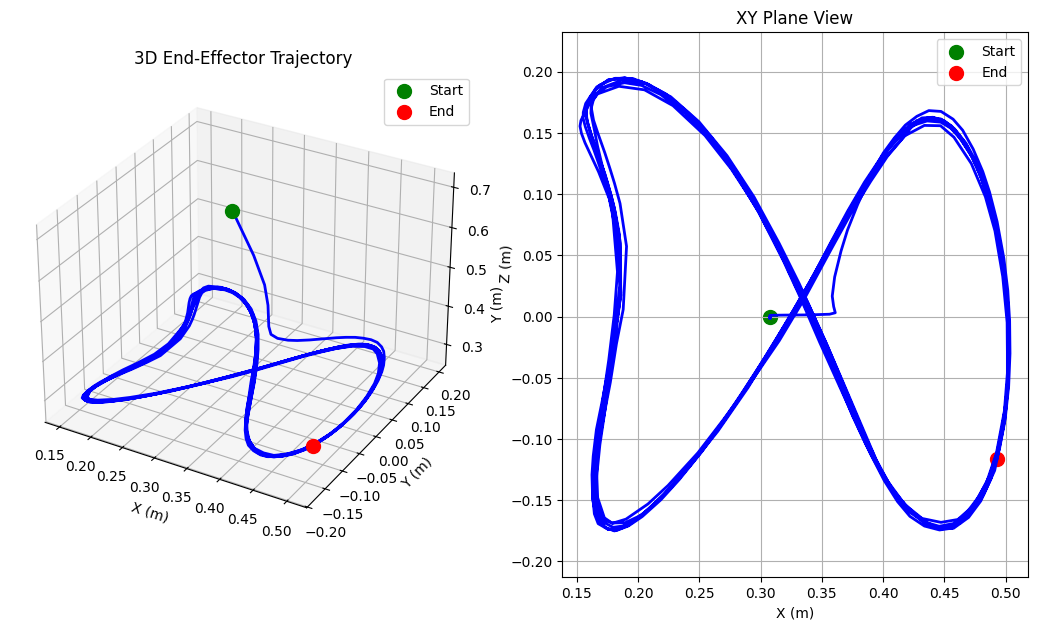

In [2]:
# Trajectory data for local robot
import os
import numpy as np
import matplotlib.pyplot as plt
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr

os.chdir('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws')
bag_path = "trajectory_data_nodelay"  # Path to the recorded bag file

poses = []

with Reader(bag_path) as reader:
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/local_robot/ee_pose':
            msg = deserialize_cdr(rawdata, connection.msgtype)
            
            # Extract pose data
            poses.append([
                msg.pose.position.x,
                msg.pose.position.y,
                msg.pose.position.z,
                timestamp * 1e-9 
            ])

poses = np.array(poses)


# Normalize time to start from 0
poses[:, 3] = poses[:, 3] - poses[0, 3]

fig = plt.figure(figsize=(16, 12))

# 3D trajectory
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(poses[:, 0], poses[:, 1], poses[:, 2], 'b-', linewidth=2)
ax1.scatter(poses[0, 0], poses[0, 1], poses[0, 2], c='green', s=100, label='Start')
ax1.scatter(poses[-1, 0], poses[-1, 1], poses[-1, 2], c='red', s=100, label='End')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.legend()
ax1.set_title('3D End-Effector Trajectory')

# XY plane view
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(poses[:, 0], poses[:, 1], 'b-', linewidth=2)
ax2.scatter(poses[0, 0], poses[0, 1], c='green', s=100, label='Start')
ax2.scatter(poses[-1, 0], poses[-1, 1], c='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

# Workspace bounds
x_range = [np.min(poses[:, 0]), np.max(poses[:, 0])]
y_range = [np.min(poses[:, 1]), np.max(poses[:, 1])]
z_range = [np.min(poses[:, 2]), np.max(poses[:, 2])]

plt.tight_layout()
plt.show()

/tmp/ipykernel_20198/2884055306.py:16: DeprecationWarning: Global serialization/deserialization functions have been replaced with
explicit typestores.

If you are deserializing messages from an AnyReader instance, simply
use its `.deserialize(data, typename)` method.

Otherwise instantiate a type store and use its methods:

from rosbags.typesys import Stores, get_typestore

typestore = get_typestore(Stores.ROS2_FOXY)
typestore.deserialize_cdr(data, typename)
  msg = deserialize_cdr(rawdata, connection.msgtype)


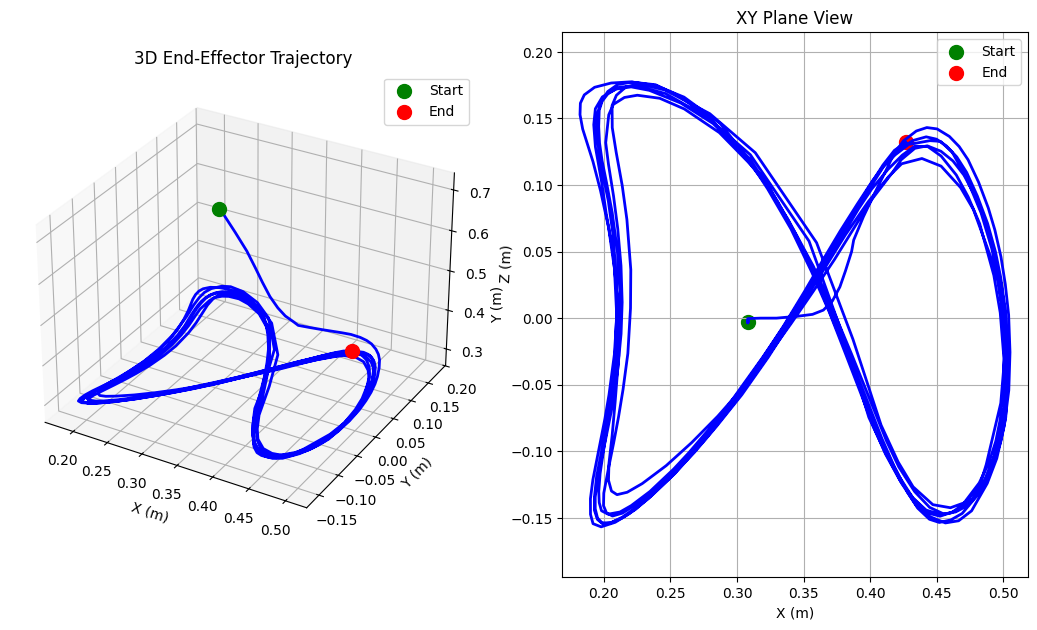

In [3]:
# Trajectory data for remote robot
import os
import numpy as np
import matplotlib.pyplot as plt
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr

os.chdir('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws')
bag_path = "trajectory_data_nodelay"  # Path to the recorded bag file

poses = []

with Reader(bag_path) as reader:
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/remote_robot/ee_pose':
            msg = deserialize_cdr(rawdata, connection.msgtype)
            
            # Extract pose data
            poses.append([
                msg.pose.position.x,
                msg.pose.position.y,
                msg.pose.position.z,
                timestamp * 1e-9 
            ])

poses = np.array(poses)


# Normalize time to start from 0
poses[:, 3] = poses[:, 3] - poses[0, 3]

fig = plt.figure(figsize=(16, 12))

# 3D trajectory
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(poses[:, 0], poses[:, 1], poses[:, 2], 'b-', linewidth=2)
ax1.scatter(poses[0, 0], poses[0, 1], poses[0, 2], c='green', s=100, label='Start')
ax1.scatter(poses[-1, 0], poses[-1, 1], poses[-1, 2], c='red', s=100, label='End')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.legend()
ax1.set_title('3D End-Effector Trajectory')

# XY plane view
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(poses[:, 0], poses[:, 1], 'b-', linewidth=2)
ax2.scatter(poses[0, 0], poses[0, 1], c='green', s=100, label='Start')
ax2.scatter(poses[-1, 0], poses[-1, 1], c='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

# Workspace bounds
x_range = [np.min(poses[:, 0]), np.max(poses[:, 0])]
y_range = [np.min(poses[:, 1]), np.max(poses[:, 1])]
z_range = [np.min(poses[:, 2]), np.max(poses[:, 2])]

plt.tight_layout()
plt.show()

In [4]:
def synchronize_by_timestamp(bag_path="trajectory_data_nodelay"):
    """Synchronize local and remote data by closest timestamps."""
    
    local_data = []
    remote_data = []
    
    with Reader(bag_path) as reader:
        for connection, timestamp, rawdata in reader.messages():
            msg = deserialize_cdr(rawdata, connection.msgtype)
            time_sec = timestamp * 1e-9
            
            if connection.topic == '/local_robot/ee_pose':
                local_data.append([msg.pose.position.x, msg.pose.position.y, 
                                 msg.pose.position.z, time_sec])
            elif connection.topic == '/remote_robot/ee_pose':
                remote_data.append([msg.pose.position.x, msg.pose.position.y, 
                                  msg.pose.position.z, time_sec])
    
    local_data = np.array(local_data)
    remote_data = np.array(remote_data)
    
    # Synchronize by finding closest timestamps
    synchronized_pairs = []
    
    for i, remote_point in enumerate(remote_data):
        remote_time = remote_point[3]
        
        # Find closest local timestamp
        time_diffs = np.abs(local_data[:, 3] - remote_time)
        closest_idx = np.argmin(time_diffs)
        time_diff = time_diffs[closest_idx]
        
        # Only pair if timestamps are close (< 0.1s)
        if time_diff < 0.1:
            local_point = local_data[closest_idx]
            
            print(f"Pair {len(synchronized_pairs)}:")
            print(f"  LOCAL:  t={local_point[3]:.3f}s, pos=[{local_point[0]:.3f}, {local_point[1]:.3f}, {local_point[2]:.3f}]")
            print(f"  REMOTE: t={remote_time:.3f}s, pos=[{remote_point[0]:.3f}, {remote_point[1]:.3f}, {remote_point[2]:.3f}]")
            print(f"  Time diff: {time_diff:.3f}s")
            
            # Calculate spatial error
            spatial_error = np.linalg.norm(remote_point[:3] - local_point[:3])
            print(f"  Spatial error: {spatial_error:.3f}m ({spatial_error*1000:.1f}mm)")
            print()
            
            synchronized_pairs.append((local_point[:3], remote_point[:3], time_diff, spatial_error))
    
    # Calculate overall statistics
    if synchronized_pairs:
        errors = [pair[3] for pair in synchronized_pairs]
        time_diffs = [pair[2] for pair in synchronized_pairs]
        
        print(f"=== SYNCHRONIZATION RESULTS ===")
        print(f"Synchronized pairs: {len(synchronized_pairs)}")
        print(f"Average time difference: {np.mean(time_diffs):.3f}s")
        print(f"Max time difference: {np.max(time_diffs):.3f}s")
        print(f"Mean spatial error: {np.mean(errors):.3f}m ({np.mean(errors)*1000:.1f}mm)")
        print(f"RMS spatial error: {np.sqrt(np.mean(np.array(errors)**2)):.3f}m")
    
    return synchronized_pairs

# Run the synchronization
synchronized_data = synchronize_by_timestamp()

Pair 0:
  LOCAL:  t=1752234703.158s, pos=[0.308, -0.001, 0.704]
  REMOTE: t=1752234703.155s, pos=[0.308, -0.003, 0.710]
  Time diff: 0.003s
  Spatial error: 0.007m (6.6mm)

Pair 1:
  LOCAL:  t=1752234703.618s, pos=[0.308, -0.000, 0.703]
  REMOTE: t=1752234703.617s, pos=[0.308, -0.002, 0.710]
  Time diff: 0.000s
  Spatial error: 0.007m (6.6mm)

Pair 2:
  LOCAL:  t=1752234704.079s, pos=[0.308, -0.000, 0.703]
  REMOTE: t=1752234704.072s, pos=[0.308, -0.002, 0.710]
  Time diff: 0.007s
  Spatial error: 0.006m (6.5mm)

Pair 3:
  LOCAL:  t=1752234704.518s, pos=[0.308, -0.001, 0.704]
  REMOTE: t=1752234704.521s, pos=[0.308, -0.002, 0.710]
  Time diff: 0.003s
  Spatial error: 0.007m (6.5mm)

Pair 4:
  LOCAL:  t=1752234705.039s, pos=[0.308, -0.001, 0.704]
  REMOTE: t=1752234705.048s, pos=[0.308, -0.002, 0.710]
  Time diff: 0.009s
  Spatial error: 0.006m (6.2mm)

Pair 5:
  LOCAL:  t=1752234705.458s, pos=[0.308, -0.002, 0.704]
  REMOTE: t=1752234705.466s, pos=[0.308, -0.002, 0.710]
  Time diff: 0.

/tmp/ipykernel_20198/3581262405.py:9: DeprecationWarning: Global serialization/deserialization functions have been replaced with
explicit typestores.

If you are deserializing messages from an AnyReader instance, simply
use its `.deserialize(data, typename)` method.

Otherwise instantiate a type store and use its methods:

from rosbags.typesys import Stores, get_typestore

typestore = get_typestore(Stores.ROS2_FOXY)
typestore.deserialize_cdr(data, typename)
  msg = deserialize_cdr(rawdata, connection.msgtype)
